<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/TrajectoryAugmentation/test_convetImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random, cv2
import numpy as np
import pandas as pd

In [2]:
# 빈 캔버스 만들기
def init() -> np.array: 
    blank = np.zeros([512,512],dtype=np.uint8)
    blank.fill(0)
    blank = cv2.resize(blank,(512,512))

    return blank

# Convert 0-1 Images into 0-255 Image
def drawNp(img: np.array) -> np.array:
    blank = init()

    rowChange = [ -1, -1, -1, 0, 0, 0, 1, 1, 1 ]
    colChange = [ -1, 0, 1, -1, 0, 1, -1, 0, 1 ]
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if img[i][j] == 1 :
                for rc, cc in zip( rowChange, colChange ):
                    newRow, newCol = i + rc, j + cc
                    if ( 0 <= newRow < img.shape[0] and 0 <= newCol < img.shape[1] ):
                        blank[newRow][newCol] = 255

    return blank

In [3]:
# Convert csv File to Image
def map2Image(minX: float, minY: float, maxX: float, maxY: float, csv_file: pd.DataFrame) -> np.array:
    inputImage = np.zeros([512,512], dtype=np.uint8)

    for i in range(0,csv_file.shape[0]):
        x = csv_file.loc[i][0]
        y = csv_file.loc[i][1]

        # Print Dot
        mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
        mapY = int(round(np.interp(y,[minY,maxY],[0,500])))
        inputImage[mapX][mapY] = 1

    outputImage = drawNp(inputImage)

    rotImage = np.rot90(outputImage)

    return rotImage


# Convert csv File to Image with Noise
def map2Image_noise(minX: float, minY: float, maxX: float, maxY: float, csv_file: pd.DataFrame) -> np.array:
    inputImage = np.zeros([512,512], dtype=np.uint8)

    randomList = set()
    while len(randomList) < int(csv_file.shape[0] / 7):
        randomList.add(random.randint(0,csv_file.shape[0]))

    randomList=list(randomList)
    dicisionList = [1,-1]

    for i in range(0, csv_file.shape[0]):
        try:
            # Generate Noise
            randomList.index(i)

            r = random.uniform((minX - maxX) / 40,(minX - maxX) / 20)
            D = random.choice(dicisionList)

            x = csv_file.loc[i][0] - (D * r)
            y = csv_file.loc[i][1] - (D * r)

            # Paint dot
            mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
            mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
            inputImage[mapX][mapY] = 1

        except:
            x = csv_file.loc[i][0]
            y = csv_file.loc[i][1]

            mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
            mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
            inputImage[mapX][mapY] = 1


    outputImage = drawNp(inputImage)

    rotImage = np.rot90(outputImage)

    return rotImage


def map2Image_remove(minX: float, minY: float, maxX: float, maxY: float, csv_file: pd.DataFrame) -> np.array:
    inputImage = np.zeros([512,512], dtype=np.uint8)

    removeList = [ ]
    fileNum = csv_file.shape[0]
    for _ in range( int( fileNum * 0.5 ) ):
        idx = random.randint( 0, fileNum )
        while ( idx in removeList ):
            idx = random.randint( 0, fileNum )

        removeList.append( idx )

    for i in range(0, fileNum):
        if ( i in removeList ):
            continue

        x = csv_file.loc[i][0]
        y = csv_file.loc[i][1]

        # Print Dot
        mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
        mapY = int(round(np.interp(y,[minY,maxY],[0,500])))
        inputImage[mapX][mapY] = 1

    outputImage = drawNp(inputImage)

    rotImage = np.rot90(outputImage)

    return rotImage


In [4]:
# Return Max and Min X,Y Coordinate Value of file
def coorMaxMin(file: pd.DataFrame) -> (float, float, float, float):
    minX, minY = (file.loc[0][0], file.loc[0][1])
    maxX, maxY = (file.loc[0][0], file.loc[0][1])
    for i in range(0,file.shape[0]):
        x = file.loc[i][0]
        y = file.loc[i][1]
        if x > maxX :
            maxX = x
        if x < minX :
            minX = x
        if y > maxY :
            maxY = y
        if y < minY :
            minY = y
    return minX, minY, maxX, maxY

In [5]:
import glob

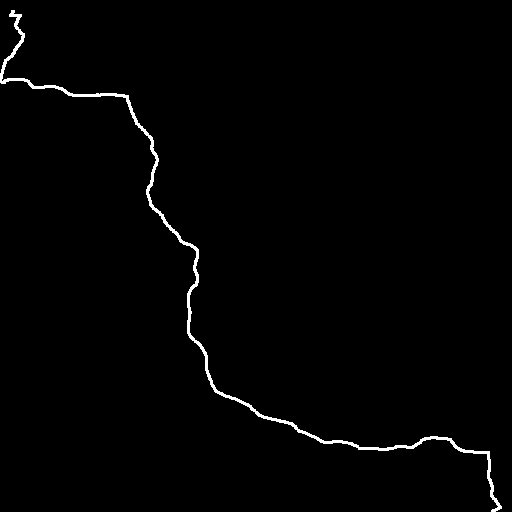

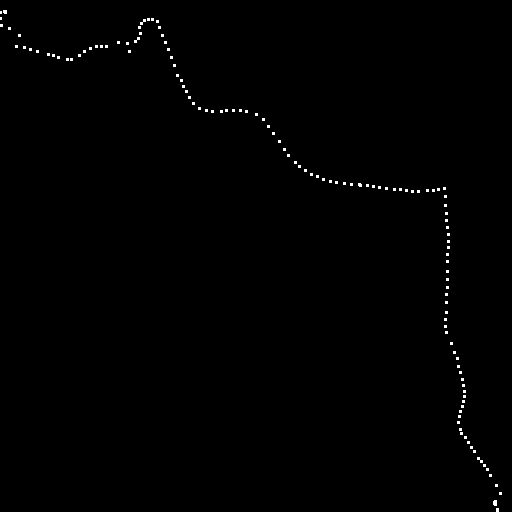

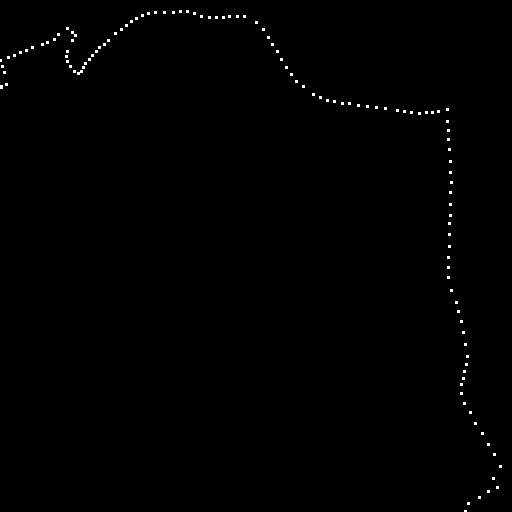

In [6]:
from google.colab.patches import cv2_imshow

trainFiles = glob.glob( '*csv' )

for f in trainFiles:
    csv_file = pd.read_csv( f, names = [ 'lat', 'long', 'num' ], header = None )
    maxMinValues = coorMaxMin( csv_file )

    resultImage = map2Image( *maxMinValues, csv_file )

    cv2_imshow( resultImage )